In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/iris3.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# 넓이와 길이에따라 품종이 달라져

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

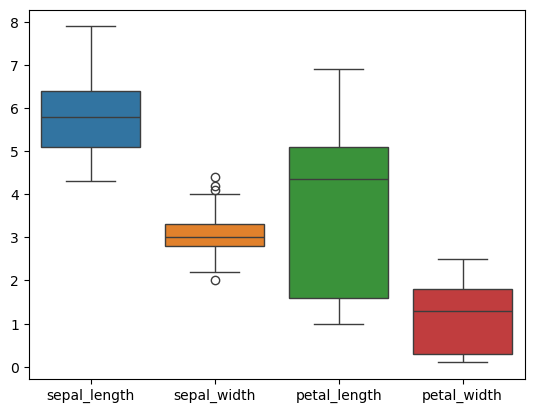

In [6]:
sns.boxplot(data)

In [7]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
X= data.drop("species", axis=1)
y = data['species']

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
y_labeled = le.fit_transform(y)

In [13]:
y_labeled

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [16]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y_labeled, test_size=0.3, random_state=10)

In [17]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=10)
dtc.fit(X_train2, y_train2)
pred2 = dtc.predict(X_test2)
print(classification_report(y_test2, pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [18]:
y= pd.get_dummies(y)
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.3, random_state=10)

# Sequential

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-09-10 10:19:58.699691: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 10:20:00.515217: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2024-09-10 10:20:00.515360: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2024-09-10 10:20:00.519269: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2024-09-10 10:20:01.110013: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 1 compatible adapters.


In [21]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
Total params: 159
Trainable params: 159
Non-trainable params: 0
_________________________________________________________________


2024-09-10 10:20:01.414838: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 10:20:01.416343: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) Graphics)
2024-09-10 10:20:01.490759: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 10:20:01.490809: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-10 10:20:01.490831: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=500, batch_size=150, validation_data=(X_test, y_test))
pred = model.predict(X_test)
pred = pd.DataFrame(pred)  

Epoch 1/500


2024-09-10 10:23:46.275373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 10:23:46.318938: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 10:23:46.319015: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 1s 903ms/step - loss: 1.1375 - accuracy: 0.3429 - val_loss: 1.1626 - val_accuracy: 0.3111
Epoch 2/500
1/1 [==============================] - 0s 48ms/step - loss: 1.1358 - accuracy: 0.3429 - val_loss: 1.1608 - val_accuracy: 0.3111
Epoch 3/500
1/1 [==============================] - 0s 46ms/step - loss: 1.1342 - accuracy: 0.3429 - val_loss: 1.1590 - val_accuracy: 0.3111
Epoch 4/500
1/1 [==============================] - 0s 47ms/step - loss: 1.1326 - accuracy: 0.3429 - val_loss: 1.1572 - val_accuracy: 0.3111
Epoch 5/500
1/1 [==============================] - ETA: 0s - loss: 1.1310 - accuracy: 0.3429

2024-09-10 10:23:46.861177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 10:23:46.884691: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 10:23:46.884770: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 0s 45ms/step - loss: 1.1310 - accuracy: 0.3429 - val_loss: 1.1554 - val_accuracy: 0.3111
Epoch 6/500
1/1 [==============================] - 0s 48ms/step - loss: 1.1294 - accuracy: 0.3429 - val_loss: 1.1537 - val_accuracy: 0.3111
Epoch 7/500
1/1 [==============================] - 0s 44ms/step - loss: 1.1278 - accuracy: 0.3429 - val_loss: 1.1519 - val_accuracy: 0.3111
Epoch 8/500
1/1 [==============================] - 0s 47ms/step - loss: 1.1263 - accuracy: 0.3429 - val_loss: 1.1501 - val_accuracy: 0.3111
Epoch 9/500
1/1 [==============================] - 0s 48ms/step - loss: 1.1247 - accuracy: 0.3429 - val_loss: 1.1483 - val_accuracy: 0.3111
Epoch 10/500
1/1 [==============================] - 0s 46ms/step - loss: 1.1232 - accuracy: 0.3429 - val_loss: 1.1466 - val_accuracy: 0.3111
Epoch 11/500
1/1 [==============================] - 0s 44ms/step - loss: 1.1217 - accuracy: 0.3429 - val_loss: 1.1449 - val_accuracy: 0.3111
Epoch 12/500
1/1 [============

1/1 [==============================] - 0s 48ms/step - loss: 0.9763 - accuracy: 0.6857 - val_loss: 1.0016 - val_accuracy: 0.6000
Epoch 122/500
1/1 [==============================] - 0s 43ms/step - loss: 0.9746 - accuracy: 0.6857 - val_loss: 1.0001 - val_accuracy: 0.6000
Epoch 123/500
1/1 [==============================] - 0s 47ms/step - loss: 0.9730 - accuracy: 0.6857 - val_loss: 0.9986 - val_accuracy: 0.6000
Epoch 124/500
1/1 [==============================] - 0s 45ms/step - loss: 0.9713 - accuracy: 0.6857 - val_loss: 0.9970 - val_accuracy: 0.6000
Epoch 125/500
1/1 [==============================] - 0s 45ms/step - loss: 0.9696 - accuracy: 0.6857 - val_loss: 0.9955 - val_accuracy: 0.6000
Epoch 126/500
1/1 [==============================] - 0s 40ms/step - loss: 0.9679 - accuracy: 0.6857 - val_loss: 0.9939 - val_accuracy: 0.6000
Epoch 127/500
1/1 [==============================] - 0s 46ms/step - loss: 0.9663 - accuracy: 0.6857 - val_loss: 0.9923 - val_accuracy: 0.6000
Epoch 128/500
1/1 [=

Epoch 179/500
1/1 [==============================] - 0s 44ms/step - loss: 0.8628 - accuracy: 0.6857 - val_loss: 0.8950 - val_accuracy: 0.6222
Epoch 180/500
1/1 [==============================] - 0s 44ms/step - loss: 0.8606 - accuracy: 0.6857 - val_loss: 0.8929 - val_accuracy: 0.6222
Epoch 181/500
1/1 [==============================] - 0s 44ms/step - loss: 0.8583 - accuracy: 0.6857 - val_loss: 0.8908 - val_accuracy: 0.6222
Epoch 182/500
1/1 [==============================] - 0s 46ms/step - loss: 0.8560 - accuracy: 0.6857 - val_loss: 0.8887 - val_accuracy: 0.6222
Epoch 183/500
1/1 [==============================] - 0s 46ms/step - loss: 0.8538 - accuracy: 0.6857 - val_loss: 0.8866 - val_accuracy: 0.6222
Epoch 184/500
1/1 [==============================] - 0s 46ms/step - loss: 0.8515 - accuracy: 0.6857 - val_loss: 0.8845 - val_accuracy: 0.6222
Epoch 185/500
1/1 [==============================] - 0s 47ms/step - loss: 0.8492 - accuracy: 0.6857 - val_loss: 0.8823 - val_accuracy: 0.6222
Epoch 

Epoch 237/500
1/1 [==============================] - 0s 48ms/step - loss: 0.7279 - accuracy: 0.7048 - val_loss: 0.7673 - val_accuracy: 0.6444
Epoch 238/500
1/1 [==============================] - 0s 48ms/step - loss: 0.7256 - accuracy: 0.7143 - val_loss: 0.7651 - val_accuracy: 0.6444
Epoch 239/500
1/1 [==============================] - 0s 48ms/step - loss: 0.7233 - accuracy: 0.7143 - val_loss: 0.7629 - val_accuracy: 0.6444
Epoch 240/500
1/1 [==============================] - 0s 47ms/step - loss: 0.7211 - accuracy: 0.7143 - val_loss: 0.7608 - val_accuracy: 0.6444
Epoch 241/500
1/1 [==============================] - 0s 44ms/step - loss: 0.7188 - accuracy: 0.7143 - val_loss: 0.7586 - val_accuracy: 0.6444
Epoch 242/500
1/1 [==============================] - 0s 43ms/step - loss: 0.7165 - accuracy: 0.7143 - val_loss: 0.7565 - val_accuracy: 0.6444
Epoch 243/500
1/1 [==============================] - 0s 45ms/step - loss: 0.7143 - accuracy: 0.7143 - val_loss: 0.7544 - val_accuracy: 0.6444
Epoch 

Epoch 295/500
1/1 [==============================] - 0s 45ms/step - loss: 0.6081 - accuracy: 0.7143 - val_loss: 0.6521 - val_accuracy: 0.6444
Epoch 296/500
1/1 [==============================] - 0s 45ms/step - loss: 0.6063 - accuracy: 0.7143 - val_loss: 0.6504 - val_accuracy: 0.6444
Epoch 297/500
1/1 [==============================] - 0s 47ms/step - loss: 0.6045 - accuracy: 0.7143 - val_loss: 0.6487 - val_accuracy: 0.6444
Epoch 298/500
1/1 [==============================] - 0s 44ms/step - loss: 0.6028 - accuracy: 0.7143 - val_loss: 0.6470 - val_accuracy: 0.6444
Epoch 299/500
1/1 [==============================] - 0s 48ms/step - loss: 0.6010 - accuracy: 0.7143 - val_loss: 0.6454 - val_accuracy: 0.6444
Epoch 300/500
1/1 [==============================] - 0s 45ms/step - loss: 0.5993 - accuracy: 0.7143 - val_loss: 0.6437 - val_accuracy: 0.6444
Epoch 301/500
1/1 [==============================] - 0s 44ms/step - loss: 0.5976 - accuracy: 0.7143 - val_loss: 0.6421 - val_accuracy: 0.6444
Epoch 

Epoch 353/500
1/1 [==============================] - 0s 49ms/step - loss: 0.5225 - accuracy: 0.7524 - val_loss: 0.5668 - val_accuracy: 0.6444
Epoch 354/500
1/1 [==============================] - 0s 45ms/step - loss: 0.5213 - accuracy: 0.7524 - val_loss: 0.5656 - val_accuracy: 0.6444
Epoch 355/500
1/1 [==============================] - 0s 47ms/step - loss: 0.5202 - accuracy: 0.7524 - val_loss: 0.5644 - val_accuracy: 0.6444
Epoch 356/500
1/1 [==============================] - 0s 46ms/step - loss: 0.5190 - accuracy: 0.7619 - val_loss: 0.5632 - val_accuracy: 0.6667
Epoch 357/500
1/1 [==============================] - 0s 44ms/step - loss: 0.5178 - accuracy: 0.7619 - val_loss: 0.5620 - val_accuracy: 0.6667
Epoch 358/500
1/1 [==============================] - 0s 48ms/step - loss: 0.5167 - accuracy: 0.7619 - val_loss: 0.5609 - val_accuracy: 0.6667
Epoch 359/500
1/1 [==============================] - 0s 47ms/step - loss: 0.5156 - accuracy: 0.7619 - val_loss: 0.5598 - val_accuracy: 0.6667
Epoch 

Epoch 411/500
1/1 [==============================] - 0s 41ms/step - loss: 0.4665 - accuracy: 0.7905 - val_loss: 0.5100 - val_accuracy: 0.6889
Epoch 412/500
1/1 [==============================] - 0s 47ms/step - loss: 0.4657 - accuracy: 0.7905 - val_loss: 0.5093 - val_accuracy: 0.6889
Epoch 413/500
1/1 [==============================] - 0s 48ms/step - loss: 0.4649 - accuracy: 0.7905 - val_loss: 0.5085 - val_accuracy: 0.6889
Epoch 414/500
1/1 [==============================] - 0s 45ms/step - loss: 0.4642 - accuracy: 0.7905 - val_loss: 0.5077 - val_accuracy: 0.6889
Epoch 415/500
1/1 [==============================] - 0s 45ms/step - loss: 0.4634 - accuracy: 0.7905 - val_loss: 0.5070 - val_accuracy: 0.6889
Epoch 416/500
1/1 [==============================] - 0s 47ms/step - loss: 0.4626 - accuracy: 0.7905 - val_loss: 0.5062 - val_accuracy: 0.6889
Epoch 417/500
1/1 [==============================] - 0s 43ms/step - loss: 0.4619 - accuracy: 0.7905 - val_loss: 0.5055 - val_accuracy: 0.6889
Epoch 

Epoch 469/500
1/1 [==============================] - 0s 46ms/step - loss: 0.4279 - accuracy: 0.8095 - val_loss: 0.4707 - val_accuracy: 0.7556
Epoch 470/500
1/1 [==============================] - 0s 46ms/step - loss: 0.4273 - accuracy: 0.8190 - val_loss: 0.4701 - val_accuracy: 0.7556
Epoch 471/500
1/1 [==============================] - 0s 45ms/step - loss: 0.4268 - accuracy: 0.8190 - val_loss: 0.4695 - val_accuracy: 0.7556
Epoch 472/500
1/1 [==============================] - 0s 47ms/step - loss: 0.4262 - accuracy: 0.8190 - val_loss: 0.4689 - val_accuracy: 0.7556
Epoch 473/500
1/1 [==============================] - 0s 47ms/step - loss: 0.4257 - accuracy: 0.8190 - val_loss: 0.4682 - val_accuracy: 0.7556
Epoch 474/500
1/1 [==============================] - 0s 48ms/step - loss: 0.4251 - accuracy: 0.8190 - val_loss: 0.4676 - val_accuracy: 0.7556
Epoch 475/500
1/1 [==============================] - 0s 47ms/step - loss: 0.4246 - accuracy: 0.8190 - val_loss: 0.4670 - val_accuracy: 0.7556
Epoch 

2024-09-10 10:24:11.736517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 10:24:11.760647: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 10:24:11.760729: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-10 10:24:11.765459: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 10:24:11.765527: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

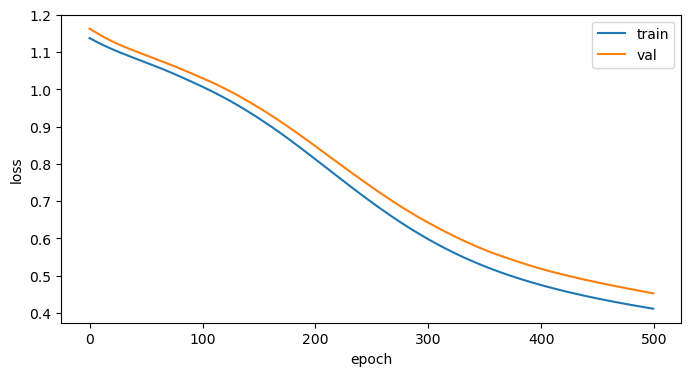

In [28]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 함수형

In [29]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [30]:
len(X_train.columns)

4

In [31]:
X_train.shape[1]

4

In [32]:
inputs = Input(shape=(X_train.shape[1],))
x = Dense(16, activation='relu')(inputs)
x = Dense(8, activation='relu')(x)
x = Dense(3, activation='softmax')(x)

In [33]:
model = Model(inputs, x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_3 (Dense)             (None, 16)                80        
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(X_train, y_train, epochs=400, batch_size=150, validation_data=(X_test, y_test))

Epoch 1/400
1/1 [==============================] - ETA: 0s - loss: 1.1911 - accuracy: 0.0286

2024-09-10 10:24:33.064269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 10:24:33.106575: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 10:24:33.106641: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 1s 501ms/step - loss: 1.1911 - accuracy: 0.0286 - val_loss: 1.1864 - val_accuracy: 0.0000e+00
Epoch 2/400
1/1 [==============================] - 0s 44ms/step - loss: 1.1870 - accuracy: 0.0286 - val_loss: 1.1827 - val_accuracy: 0.0000e+00
Epoch 3/400
1/1 [==============================] - 0s 46ms/step - loss: 1.1829 - accuracy: 0.0190 - val_loss: 1.1789 - val_accuracy: 0.0000e+00
Epoch 4/400
1/1 [==============================] - 0s 45ms/step - loss: 1.1789 - accuracy: 0.0190 - val_loss: 1.1750 - val_accuracy: 0.0000e+00
Epoch 5/400
1/1 [==============================] - ETA: 0s - loss: 1.1748 - accuracy: 0.0190

2024-09-10 10:24:33.288357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 10:24:33.313276: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 10:24:33.313339: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 0s 53ms/step - loss: 1.1748 - accuracy: 0.0190 - val_loss: 1.1711 - val_accuracy: 0.0000e+00
Epoch 6/400
1/1 [==============================] - 0s 49ms/step - loss: 1.1707 - accuracy: 0.0095 - val_loss: 1.1672 - val_accuracy: 0.0222
Epoch 7/400
1/1 [==============================] - 0s 49ms/step - loss: 1.1666 - accuracy: 0.0000e+00 - val_loss: 1.1634 - val_accuracy: 0.0222
Epoch 8/400
1/1 [==============================] - 0s 46ms/step - loss: 1.1627 - accuracy: 0.0000e+00 - val_loss: 1.1597 - val_accuracy: 0.0222
Epoch 9/400
1/1 [==============================] - 0s 48ms/step - loss: 1.1587 - accuracy: 0.0000e+00 - val_loss: 1.1561 - val_accuracy: 0.0222
Epoch 10/400
1/1 [==============================] - 0s 50ms/step - loss: 1.1548 - accuracy: 0.0000e+00 - val_loss: 1.1526 - val_accuracy: 0.0000e+00
Epoch 11/400
1/1 [==============================] - 0s 46ms/step - loss: 1.1510 - accuracy: 0.0000e+00 - val_loss: 1.1491 - val_accuracy: 0.0000e+0

1/1 [==============================] - 0s 47ms/step - loss: 0.9394 - accuracy: 0.6857 - val_loss: 0.9484 - val_accuracy: 0.6222
Epoch 121/400
1/1 [==============================] - 0s 45ms/step - loss: 0.9368 - accuracy: 0.6857 - val_loss: 0.9459 - val_accuracy: 0.6222
Epoch 122/400
1/1 [==============================] - 0s 49ms/step - loss: 0.9343 - accuracy: 0.6857 - val_loss: 0.9435 - val_accuracy: 0.6222
Epoch 123/400
1/1 [==============================] - 0s 44ms/step - loss: 0.9317 - accuracy: 0.6857 - val_loss: 0.9411 - val_accuracy: 0.6222
Epoch 124/400
1/1 [==============================] - 0s 47ms/step - loss: 0.9291 - accuracy: 0.6857 - val_loss: 0.9386 - val_accuracy: 0.6222
Epoch 125/400
1/1 [==============================] - 0s 45ms/step - loss: 0.9265 - accuracy: 0.6857 - val_loss: 0.9362 - val_accuracy: 0.6222
Epoch 126/400
1/1 [==============================] - 0s 44ms/step - loss: 0.9239 - accuracy: 0.6857 - val_loss: 0.9337 - val_accuracy: 0.6222
Epoch 127/400
1/1 [=

Epoch 178/400
1/1 [==============================] - 0s 43ms/step - loss: 0.7744 - accuracy: 0.6857 - val_loss: 0.7947 - val_accuracy: 0.6222
Epoch 179/400
1/1 [==============================] - 0s 47ms/step - loss: 0.7715 - accuracy: 0.6857 - val_loss: 0.7920 - val_accuracy: 0.6222
Epoch 180/400
1/1 [==============================] - 0s 43ms/step - loss: 0.7686 - accuracy: 0.6857 - val_loss: 0.7894 - val_accuracy: 0.6222
Epoch 181/400
1/1 [==============================] - 0s 45ms/step - loss: 0.7657 - accuracy: 0.6857 - val_loss: 0.7867 - val_accuracy: 0.6222
Epoch 182/400
1/1 [==============================] - 0s 49ms/step - loss: 0.7628 - accuracy: 0.6857 - val_loss: 0.7841 - val_accuracy: 0.6222
Epoch 183/400
1/1 [==============================] - 0s 45ms/step - loss: 0.7600 - accuracy: 0.6857 - val_loss: 0.7815 - val_accuracy: 0.6222
Epoch 184/400
1/1 [==============================] - 0s 50ms/step - loss: 0.7571 - accuracy: 0.6857 - val_loss: 0.7789 - val_accuracy: 0.6222
Epoch 

Epoch 236/400
1/1 [==============================] - 0s 45ms/step - loss: 0.6241 - accuracy: 0.6857 - val_loss: 0.6552 - val_accuracy: 0.6222
Epoch 237/400
1/1 [==============================] - 0s 47ms/step - loss: 0.6218 - accuracy: 0.6857 - val_loss: 0.6531 - val_accuracy: 0.6222
Epoch 238/400
1/1 [==============================] - 0s 46ms/step - loss: 0.6196 - accuracy: 0.6857 - val_loss: 0.6510 - val_accuracy: 0.6222
Epoch 239/400
1/1 [==============================] - 0s 46ms/step - loss: 0.6175 - accuracy: 0.6857 - val_loss: 0.6489 - val_accuracy: 0.6222
Epoch 240/400
1/1 [==============================] - 0s 44ms/step - loss: 0.6153 - accuracy: 0.6857 - val_loss: 0.6468 - val_accuracy: 0.6222
Epoch 241/400
1/1 [==============================] - 0s 52ms/step - loss: 0.6131 - accuracy: 0.6857 - val_loss: 0.6447 - val_accuracy: 0.6222
Epoch 242/400
1/1 [==============================] - 0s 48ms/step - loss: 0.6110 - accuracy: 0.6857 - val_loss: 0.6426 - val_accuracy: 0.6222
Epoch 

Epoch 294/400
1/1 [==============================] - 0s 43ms/step - loss: 0.5149 - accuracy: 0.7619 - val_loss: 0.5484 - val_accuracy: 0.6667
Epoch 295/400
1/1 [==============================] - 0s 50ms/step - loss: 0.5133 - accuracy: 0.7619 - val_loss: 0.5468 - val_accuracy: 0.6667
Epoch 296/400
1/1 [==============================] - 0s 51ms/step - loss: 0.5117 - accuracy: 0.7619 - val_loss: 0.5452 - val_accuracy: 0.6667
Epoch 297/400
1/1 [==============================] - 0s 49ms/step - loss: 0.5102 - accuracy: 0.7619 - val_loss: 0.5436 - val_accuracy: 0.6667
Epoch 298/400
1/1 [==============================] - 0s 45ms/step - loss: 0.5086 - accuracy: 0.7619 - val_loss: 0.5420 - val_accuracy: 0.6667
Epoch 299/400
1/1 [==============================] - 0s 43ms/step - loss: 0.5070 - accuracy: 0.7619 - val_loss: 0.5404 - val_accuracy: 0.6667
Epoch 300/400
1/1 [==============================] - 0s 45ms/step - loss: 0.5055 - accuracy: 0.7619 - val_loss: 0.5389 - val_accuracy: 0.6667
Epoch 

Epoch 352/400
1/1 [==============================] - 0s 47ms/step - loss: 0.4317 - accuracy: 0.8571 - val_loss: 0.4601 - val_accuracy: 0.8222
Epoch 353/400
1/1 [==============================] - 0s 46ms/step - loss: 0.4304 - accuracy: 0.8571 - val_loss: 0.4587 - val_accuracy: 0.8222
Epoch 354/400
1/1 [==============================] - 0s 46ms/step - loss: 0.4290 - accuracy: 0.8571 - val_loss: 0.4572 - val_accuracy: 0.8222
Epoch 355/400
1/1 [==============================] - 0s 47ms/step - loss: 0.4277 - accuracy: 0.8667 - val_loss: 0.4557 - val_accuracy: 0.8222
Epoch 356/400
1/1 [==============================] - 0s 45ms/step - loss: 0.4263 - accuracy: 0.8667 - val_loss: 0.4543 - val_accuracy: 0.8222
Epoch 357/400
1/1 [==============================] - 0s 46ms/step - loss: 0.4250 - accuracy: 0.8667 - val_loss: 0.4528 - val_accuracy: 0.8222
Epoch 358/400
1/1 [==============================] - 0s 44ms/step - loss: 0.4236 - accuracy: 0.8667 - val_loss: 0.4514 - val_accuracy: 0.8222
Epoch 

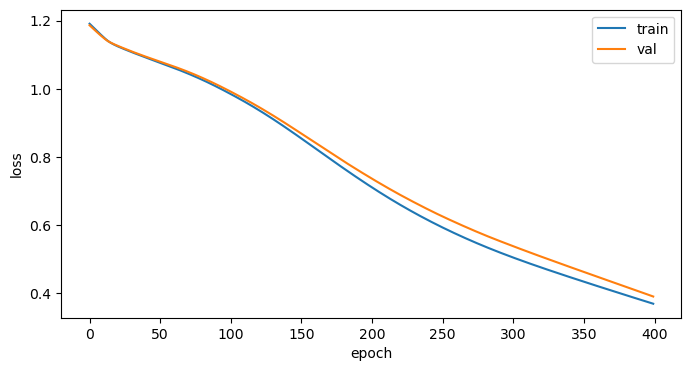

In [35]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 클래스형

In [36]:
import tensorflow as tf

In [37]:
class Iris(tf.keras.Model):
    def __init__(self):
        super(Iris, self).__init__()
        self.dense1 = tf.keras.layers.Dense(32, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.classifier = tf.keras.layers.Dense(3, activation='softmax')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.classifier(x)

In [38]:
y_train

,Iris-setosa,Iris-versicolor,Iris-virginica
32,True,False,False
52,False,True,False
70,False,True,False
121,False,False,True
144,False,False,True
...,...,...,...
113,False,False,True
64,False,True,False
15,True,False,False
125,False,False,True


In [39]:
model = Iris()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=500, batch_size=150, validation_data=(X_test, y_test))

Epoch 1/500


2024-09-10 10:24:53.627528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 10:24:53.670303: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 10:24:53.670369: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 1s 690ms/step - loss: 1.0579 - accuracy: 0.6667 - val_loss: 1.0763 - val_accuracy: 0.6000
Epoch 2/500
1/1 [==============================] - 0s 44ms/step - loss: 1.0512 - accuracy: 0.6857 - val_loss: 1.0697 - val_accuracy: 0.6000
Epoch 3/500
1/1 [==============================] - 0s 45ms/step - loss: 1.0444 - accuracy: 0.6857 - val_loss: 1.0629 - val_accuracy: 0.6222
Epoch 4/500
1/1 [==============================] - 0s 47ms/step - loss: 1.0374 - accuracy: 0.6857 - val_loss: 1.0561 - val_accuracy: 0.6222
Epoch 5/500
1/1 [==============================] - ETA: 0s - loss: 1.0304 - accuracy: 0.6857

2024-09-10 10:24:53.997551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 10:24:54.021378: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 10:24:54.021465: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 0s 45ms/step - loss: 1.0304 - accuracy: 0.6857 - val_loss: 1.0493 - val_accuracy: 0.6222
Epoch 6/500
1/1 [==============================] - 0s 46ms/step - loss: 1.0233 - accuracy: 0.6857 - val_loss: 1.0425 - val_accuracy: 0.6222
Epoch 7/500
1/1 [==============================] - 0s 48ms/step - loss: 1.0162 - accuracy: 0.6857 - val_loss: 1.0357 - val_accuracy: 0.6222
Epoch 8/500
1/1 [==============================] - 0s 47ms/step - loss: 1.0091 - accuracy: 0.6857 - val_loss: 1.0290 - val_accuracy: 0.6222
Epoch 9/500
1/1 [==============================] - 0s 45ms/step - loss: 1.0020 - accuracy: 0.6857 - val_loss: 1.0223 - val_accuracy: 0.6222
Epoch 10/500
1/1 [==============================] - 0s 42ms/step - loss: 0.9949 - accuracy: 0.6857 - val_loss: 1.0156 - val_accuracy: 0.6222
Epoch 11/500
1/1 [==============================] - 0s 46ms/step - loss: 0.9878 - accuracy: 0.6857 - val_loss: 1.0090 - val_accuracy: 0.6222
Epoch 12/500
1/1 [============

1/1 [==============================] - 0s 51ms/step - loss: 0.3253 - accuracy: 0.9524 - val_loss: 0.3527 - val_accuracy: 0.9111
Epoch 122/500
1/1 [==============================] - 0s 67ms/step - loss: 0.3222 - accuracy: 0.9524 - val_loss: 0.3491 - val_accuracy: 0.9111
Epoch 123/500
1/1 [==============================] - 0s 45ms/step - loss: 0.3190 - accuracy: 0.9524 - val_loss: 0.3455 - val_accuracy: 0.9111
Epoch 124/500
1/1 [==============================] - 0s 58ms/step - loss: 0.3158 - accuracy: 0.9524 - val_loss: 0.3419 - val_accuracy: 0.9111
Epoch 125/500
1/1 [==============================] - 0s 61ms/step - loss: 0.3127 - accuracy: 0.9524 - val_loss: 0.3384 - val_accuracy: 0.9111
Epoch 126/500
1/1 [==============================] - 0s 50ms/step - loss: 0.3095 - accuracy: 0.9524 - val_loss: 0.3349 - val_accuracy: 0.9111
Epoch 127/500
1/1 [==============================] - 0s 52ms/step - loss: 0.3064 - accuracy: 0.9524 - val_loss: 0.3315 - val_accuracy: 0.9111
Epoch 128/500
1/1 [=

Epoch 179/500
1/1 [==============================] - 0s 51ms/step - loss: 0.1755 - accuracy: 0.9714 - val_loss: 0.1850 - val_accuracy: 0.9556
Epoch 180/500
1/1 [==============================] - 0s 63ms/step - loss: 0.1737 - accuracy: 0.9714 - val_loss: 0.1829 - val_accuracy: 0.9556
Epoch 181/500
1/1 [==============================] - 0s 42ms/step - loss: 0.1720 - accuracy: 0.9714 - val_loss: 0.1808 - val_accuracy: 0.9556
Epoch 182/500
1/1 [==============================] - 0s 47ms/step - loss: 0.1703 - accuracy: 0.9714 - val_loss: 0.1787 - val_accuracy: 0.9556
Epoch 183/500
1/1 [==============================] - 0s 61ms/step - loss: 0.1686 - accuracy: 0.9714 - val_loss: 0.1767 - val_accuracy: 0.9556
Epoch 184/500
1/1 [==============================] - 0s 62ms/step - loss: 0.1669 - accuracy: 0.9714 - val_loss: 0.1748 - val_accuracy: 0.9556
Epoch 185/500
1/1 [==============================] - 0s 42ms/step - loss: 0.1653 - accuracy: 0.9714 - val_loss: 0.1729 - val_accuracy: 0.9556
Epoch 

Epoch 237/500
1/1 [==============================] - 0s 51ms/step - loss: 0.1087 - accuracy: 0.9619 - val_loss: 0.1017 - val_accuracy: 0.9778
Epoch 238/500
1/1 [==============================] - 0s 51ms/step - loss: 0.1080 - accuracy: 0.9619 - val_loss: 0.1008 - val_accuracy: 0.9778
Epoch 239/500
1/1 [==============================] - 0s 47ms/step - loss: 0.1074 - accuracy: 0.9619 - val_loss: 0.0999 - val_accuracy: 0.9778
Epoch 240/500
1/1 [==============================] - 0s 48ms/step - loss: 0.1067 - accuracy: 0.9619 - val_loss: 0.0991 - val_accuracy: 0.9778
Epoch 241/500
1/1 [==============================] - 0s 46ms/step - loss: 0.1061 - accuracy: 0.9619 - val_loss: 0.0982 - val_accuracy: 0.9778
Epoch 242/500
1/1 [==============================] - 0s 47ms/step - loss: 0.1054 - accuracy: 0.9619 - val_loss: 0.0973 - val_accuracy: 0.9778
Epoch 243/500
1/1 [==============================] - 0s 48ms/step - loss: 0.1048 - accuracy: 0.9619 - val_loss: 0.0964 - val_accuracy: 0.9778
Epoch 

Epoch 295/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0822 - accuracy: 0.9714 - val_loss: 0.0653 - val_accuracy: 0.9778
Epoch 296/500
1/1 [==============================] - 0s 46ms/step - loss: 0.0819 - accuracy: 0.9714 - val_loss: 0.0649 - val_accuracy: 0.9778
Epoch 297/500
1/1 [==============================] - 0s 47ms/step - loss: 0.0816 - accuracy: 0.9714 - val_loss: 0.0645 - val_accuracy: 0.9778
Epoch 298/500
1/1 [==============================] - 0s 56ms/step - loss: 0.0813 - accuracy: 0.9714 - val_loss: 0.0641 - val_accuracy: 0.9778
Epoch 299/500
1/1 [==============================] - 0s 41ms/step - loss: 0.0810 - accuracy: 0.9714 - val_loss: 0.0638 - val_accuracy: 0.9778
Epoch 300/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0808 - accuracy: 0.9714 - val_loss: 0.0634 - val_accuracy: 0.9778
Epoch 301/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0805 - accuracy: 0.9714 - val_loss: 0.0631 - val_accuracy: 0.9778
Epoch 

Epoch 353/500
1/1 [==============================] - 0s 38ms/step - loss: 0.0695 - accuracy: 0.9810 - val_loss: 0.0480 - val_accuracy: 0.9778
Epoch 354/500
1/1 [==============================] - 0s 37ms/step - loss: 0.0694 - accuracy: 0.9810 - val_loss: 0.0478 - val_accuracy: 0.9778
Epoch 355/500
1/1 [==============================] - 0s 42ms/step - loss: 0.0692 - accuracy: 0.9810 - val_loss: 0.0476 - val_accuracy: 0.9778
Epoch 356/500
1/1 [==============================] - 0s 35ms/step - loss: 0.0691 - accuracy: 0.9810 - val_loss: 0.0474 - val_accuracy: 0.9778
Epoch 357/500
1/1 [==============================] - 0s 36ms/step - loss: 0.0689 - accuracy: 0.9810 - val_loss: 0.0472 - val_accuracy: 0.9778
Epoch 358/500
1/1 [==============================] - 0s 35ms/step - loss: 0.0688 - accuracy: 0.9810 - val_loss: 0.0470 - val_accuracy: 0.9778
Epoch 359/500
1/1 [==============================] - 0s 35ms/step - loss: 0.0686 - accuracy: 0.9810 - val_loss: 0.0468 - val_accuracy: 0.9778
Epoch 

Epoch 411/500
1/1 [==============================] - 0s 36ms/step - loss: 0.0626 - accuracy: 0.9810 - val_loss: 0.0387 - val_accuracy: 0.9778
Epoch 412/500
1/1 [==============================] - 0s 36ms/step - loss: 0.0625 - accuracy: 0.9810 - val_loss: 0.0385 - val_accuracy: 0.9778
Epoch 413/500
1/1 [==============================] - 0s 36ms/step - loss: 0.0624 - accuracy: 0.9810 - val_loss: 0.0384 - val_accuracy: 0.9778
Epoch 414/500
1/1 [==============================] - 0s 46ms/step - loss: 0.0623 - accuracy: 0.9810 - val_loss: 0.0383 - val_accuracy: 0.9778
Epoch 415/500
1/1 [==============================] - 0s 46ms/step - loss: 0.0622 - accuracy: 0.9810 - val_loss: 0.0382 - val_accuracy: 0.9778
Epoch 416/500
1/1 [==============================] - 0s 45ms/step - loss: 0.0621 - accuracy: 0.9810 - val_loss: 0.0381 - val_accuracy: 0.9778
Epoch 417/500
1/1 [==============================] - 0s 46ms/step - loss: 0.0620 - accuracy: 0.9810 - val_loss: 0.0380 - val_accuracy: 0.9778
Epoch 

Epoch 469/500
1/1 [==============================] - 0s 42ms/step - loss: 0.0584 - accuracy: 0.9810 - val_loss: 0.0331 - val_accuracy: 0.9778
Epoch 470/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0584 - accuracy: 0.9810 - val_loss: 0.0330 - val_accuracy: 0.9778
Epoch 471/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0583 - accuracy: 0.9810 - val_loss: 0.0330 - val_accuracy: 0.9778
Epoch 472/500
1/1 [==============================] - 0s 45ms/step - loss: 0.0583 - accuracy: 0.9810 - val_loss: 0.0329 - val_accuracy: 0.9778
Epoch 473/500
1/1 [==============================] - 0s 44ms/step - loss: 0.0582 - accuracy: 0.9810 - val_loss: 0.0328 - val_accuracy: 0.9778
Epoch 474/500
1/1 [==============================] - 0s 44ms/step - loss: 0.0582 - accuracy: 0.9810 - val_loss: 0.0328 - val_accuracy: 0.9778
Epoch 475/500
1/1 [==============================] - 0s 46ms/step - loss: 0.0581 - accuracy: 0.9810 - val_loss: 0.0327 - val_accuracy: 0.9778
Epoch 

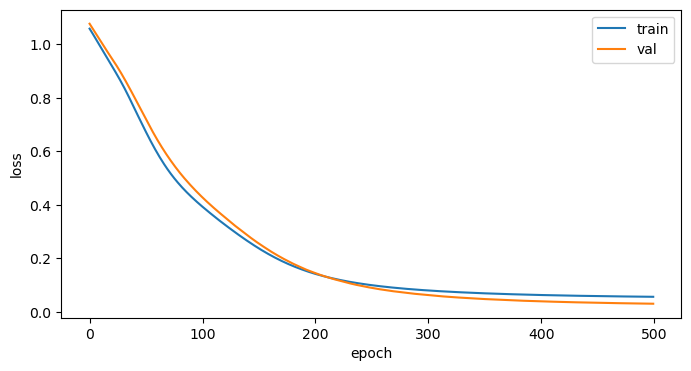

In [40]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model = Iris()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test,y_test))
pred=model.predict(X_test)
pred=pd.DataFrame(pred)
pred=pred[0].apply(lambda x: 1 if x > 5 else 0)
print(classification_report(y_test, pred))

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()